# Predicting Restaurant Food Cost 

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

Size of training set: 12,690 records
Size of test set: 4,231 records
FEATURES:
TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.
RESTAURANT_ID: A unique ID for each restaurant.
CUISINES: The variety of cuisines that the restaurant offers.
TIME: The open hours of the restaurant.
CITY: The city in which the restaurant is located.
LOCALITY: The locality of the restaurant.
RATING: The average rating of the restaurant by customers.
VOTES: The overall votes received by the restaurant.
COST: The average cost of a two-person meal.


In [67]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [68]:
#Loading Datasets
df=pd.read_csv("Restaurant_Train.csv")
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [69]:
#Loading Datasets
df_test=pd.read_csv("Restaurant_Test.csv")
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


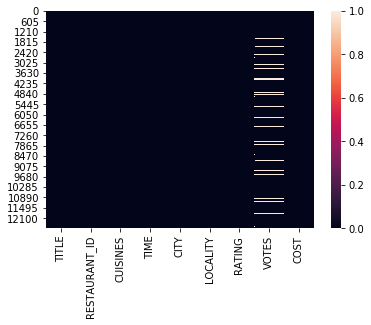

In [70]:
sns.heatmap(df.isnull())
# Null Values in Votes

In [71]:
# Let's Find Maximum number of titles mentioned in a single cell
max = 1
for i in df['TITLE']:
    if len(i.split(',')) > max:
         max = len(i.split(','))
         
print("\n\nMaximum Titles in a Cell : ", max) 



Maximum Titles in a Cell :  2


In [72]:
# Let's have a look at the titles
titles = []

for i in df['TITLE']:
    if len(i.split(',')) == 1:
         titles.append(i.split(',')[0].strip().upper())
    else :
        for j in range(len(i.split(','))):
            titles.append(i.split(',')[j].strip().upper())

print("\n\nTotal Titles : ", len(pd.Series(titles).unique()))
print("\n\nTitles:\n", pd.Series(titles).unique())

titles = list(pd.Series(titles).unique())



Total Titles :  24


Titles:
 ['CASUAL DINING' 'BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'BEVERAGE SHOP' 'IRANI CAFE' 'BAKERY' 'NONE' 'PUB'
 'FINE DINING' 'SWEET SHOP' 'LOUNGE' 'FOOD COURT' 'FOOD TRUCK' 'MESS'
 'KIOSK' 'CLUB' 'CONFECTIONERY' 'DHABA' 'MEAT SHOP' 'COCKTAIL BAR'
 'PAAN SHOP']


In [73]:
# Cuisines 
max = 1
for i in df['CUISINES'] :
    if len(i.split(',')) > max:
         max = len(i.split(','))

print("\n\nMaximum cuisines in a Cell : ", max)

cuisines = []

for i in df['CUISINES']:
    if len(i.split(',')) == 1:
         cuisines.append(i.split(',')[0].strip().upper())
    else :
        for j in range(len(i.split(','))):
            cuisines.append(i.split(',')[j].strip().upper())

print("\n\nTotal cuisines : ", len(pd.Series(cuisines).unique()))
print("\n\Cuisines:\n", pd.Series(cuisines).unique())

cuisines = list(pd.Series(cuisines).unique())



Maximum cuisines in a Cell :  8


Total cuisines :  125

\Cuisines:
 ['MALWANI' 'GOAN' 'NORTH INDIAN' 'ASIAN' 'MODERN INDIAN' 'JAPANESE'
 'CHINESE' 'BIRYANI' 'HYDERABADI' 'TIBETAN' 'DESSERTS' 'SEAFOOD' 'CAFE'
 'PIZZA' 'BURGER' 'BAR FOOD' 'SOUTH INDIAN' 'FAST FOOD' 'BEVERAGES'
 'ARABIAN' 'MUGHLAI' 'MAHARASHTRIAN' 'PARSI' 'THAI' 'BAKERY' 'MOMOS'
 'CONTINENTAL' 'EUROPEAN' 'ROLLS' 'ANDHRA' 'ITALIAN' 'BBQ' 'FINGER FOOD'
 'TEA' 'AMERICAN' 'HEALTHY FOOD' 'COFFEE' 'INDONESIAN' 'KOREAN' 'NEPALESE'
 'ICE CREAM' 'MEXICAN' 'KERALA' 'INDIAN' 'MITHAI' 'STREET FOOD'
 'MALAYSIAN' 'VIETNAMESE' 'IRANIAN' 'KEBAB' 'JUICES' 'SANDWICH'
 'MEDITERRANEAN' 'SALAD' 'GUJARATI' 'RAJASTHANI' 'TEX-MEX' 'ROAST CHICKEN'
 'BURMESE' 'CHETTINAD' 'NORTH EASTERN' 'LEBANESE' 'COFFEE AND TEA' 'GRILL'
 '' 'BIHARI' 'BENGALI' 'LUCKNOWI' 'AWADHI' 'STEAK' 'FRENCH' 'PORTUGUESE'
 'WRAPS' 'SRI LANKAN' 'ORIYA' 'ETHIOPIAN' 'KONKAN' 'SUSHI' 'SPANISH'
 'RUSSIAN' 'MANGALOREAN' 'TURKISH' 'BUBBLE TEA' 'AFGHAN' 'NAGA'
 'SINGAPOREAN' 'GERM

In [74]:
# CITY

cities = list(df['CITY'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NA'
    cities[i] = cities[i].strip().upper()
        
print("\n\nUnique cities (Including NA): ", len(pd.Series(cities).unique()))
print("\n\nCities:\n", pd.Series(cities).unique())
 
cities = list(pd.Series(cities).unique())



Unique cities (Including NA):  355


Cities:
 ['THANE' 'CHENNAI' 'MUMBAI' 'BANGALORE' 'GURGAON' 'HYDERABAD' 'KOCHI'
 'THANE WEST' 'ANDHERI LOKHANDWALA' 'NEW DELHI' 'ANDHERI WEST'
 'MALAD EAST' '682036' 'BANGALOR' 'NAVI MUMBAI' 'BANDRA WEST' 'DELHI'
 'NOIDA' 'BANGALORE-560066' 'SECUNDERABAD' 'NA' 'INDIA' 'MADHURANAGAR'
 'CHENNAI TEYNAMPET' 'FARIDABAD' 'CHEMBUR.' 'MAHARASHTRA'
 'OPP GURUDWARA SHAKURPUR' 'TELAGANA LAND LINE:040-48507016' 'GHAZIABAD'
 'KARNATAKA' 'KERALA' 'EDAPPALLY' 'KADAVANTHRA' 'ERNAKULAM CIRCLE KOCHI'
 'BENGALORE' 'NEAR RELIANCE FRESH' 'KILPAUK' 'BENGALURU' 'KOTHAGUDA'
 'GOREGAON WEST' 'BANGLORE' 'TAMIL NADU' 'KAKKANAD' 'KOCHI ELAMKULAM'
 'OUTER RING ROAD' 'MULUND EAST'
 'SECUNDERABAD MAIN ROAD NEAR SIGNAL NMREC COLLEGE' 'TELANGANA'
 'PONNURUNI KOCHI' 'GACHIBOWLI' 'SEMMANCHERI'
 '5TH MAIN TEACHERS COLONY KORAMANGALA BLOCK 1 BANGALORE 560034'
 'MUMBAI MAHIM' 'POWAI (NEXT TO POWAI PLAZA)' 'DOMBIVALI EAST'
 'KOCHI VYTTILA' 'KANDIVALI' 'KOCHI PALARIVATTOM' 'DEWAN RAMA RO

In [75]:
# LOCALITY
locs = list(df['LOCALITY'])

for i in range(len(locs)):
    if type(locs[i]) == float:
        locs[i] = 'NA'
    locs[i] = locs[i].strip().upper()
        
print("\n\n Unique Localities (Including NA) : ", len(pd.Series(locs).unique()))
print("\n\n Localities:\n", pd.Series(locs).unique())

locs = list(pd.Series(locs).unique())



 Unique Localities (Including NA) :  1399


 Localities:
 ['DOMBIVALI EAST' 'RAMAPURAM' 'SALIGRAMAM' ... 'MARKET ROAD'
 'NEAR PERAMBUR' 'NEAR MALVIYA NAGAR']


In [76]:
df.replace(to_replace = ['Bangalor','Bangalore-560066','Bengalore','Bengaluru','Banglore',
                              '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
                              'BTM Layout','JP Nagar Bangalore','Whitefield Bangalore',
                              'Bangalore - 560076','Bangalore.',
                              'Banaswadi (Next to Indian Bank) Bangalore','BTM Bangalore',
                              'Bangalore Koramangala 7th Block','bangalore : 560085',
                              'CPR layout harlur main road opposite to ozone ever green apartment Bangalore -',
                              'Karnataka 560043','Bangalore - 560103','Banglaore',
                              'Kanakapura Road Banglore','BTM 1st Stage','Marathahalli',
                              'Bangalore land mark above mahaveer hard ware','Phase 1 Bangalore',
                              'Bangalore 560076','Bangalore Road','Karnataka','Karnataka 560103',
                              'SG Palya','Karnataka 560102','Karnataka 560037', 'B.B.M.P East (Karnataka) - 560049',
                              'Malleshwaram Bangalore', 'Kadubesanahalli Bangalore',
                             'Mahadevpura','NEW BEL ROAD 560054','JP Nagar','Rajarajeshwari Nagar bangalore',
                              'Ulsoo','1st Tavarekere','Thanisandra','Indiranagar','HSR Layout'], 
                                value='Bangalore',inplace=True)

df.replace(to_replace = ['Chennai Teynampet','Tamil Nadu','Besant Nagar','Arumbakkam chennai-600106.',
                              'Avadi', 'Velachery','Pallavaram','Chennai 600034.','Chennai - 600040', 'Perungudi',
                              'Chennai Padur', 'Medavakkam', 'Chennai Kovalam', 'Chennai opp: Vasanth & co',  
                              'Mogappair. Chennai', 'Chennai Perungudi', 'Chennai Thuraipakkam', 'OMR Karapakkam',
                              'Chennai Thousand Lights',  'Chennai- 600107', 'ECR NEELANKARAI Chennai 600115',
                              'Chennai.', 'Chennai (Bang Opposite Indian Bank)','Chennai Opposite 5C Bus stand', 
                              'Mahabalipuram', 'Chennai Mahabalipuram', 'Nungambakkam','Chennai-40',
                              'East Coast Road (ECR)', 'Ramapuram', 'Chennai Chrompet','Nandanam','Thiruvanmiyur', 
                              'Ambattur','Chennai - 34 Landmark - Near Loyola College', 'Anna Nagar West', 
                              'Anna Salai','Chenn ai', 'Perambur', 'Vadapalani','Palavakkam','Sholinganallur',
                              'Mogappair', 'Ashok Nagar', 'Chennai. (Near Hotel Matshya)',  'Chromepet',
                              'chennai','Tambaram','Vadapalani', 'Anna Nagar East','Kilpauk','Potheri',
                              'GST Road', 'Vadapalani.','Semmancheri','Dewan Rama Road','Navallur','Kolathur'],
                                value='Chennai',inplace=True)

df.replace(to_replace=['Telagana Land Line:040-48507016', 'Telangana','Gachibowli','Kondapur', 'Madhapur',
                            'Hyderabad Behind Vacs Pastries','Hyderabad neerus emporium.', 'Hitech City',
                            'Telangana 500003','Hyderabad.', 'Telangana 500034','Telangana 500032',
                            'Hyderabad-500032','Near Santosh Banjara Hyderabad','Gachibowli Hyderabad',
                            'hyderabad', 'Telengana','Telangana 500081','Kondapur.',  'Telangana 500070',
                            'Begumpet Hyderabad','Hyderabad Manikonda','Jubilee Hills'],value='Hyderabad',inplace=True)

df.replace(to_replace = ['Kerala', 'Edappally','Ernakulam Circle kochi','Kochi Elamkulam','Ponnuruni Kochi', 
                              'Kochi Vyttila', 'Kochi Palarivattom','Ernakulam', 'Kochi Chullickal',
                              'Kochi-683101','p.o Kochi','Kerala 683104','Kerala 682013',
                              'MALAPALLIPURAM P .O THRISSUR','Kochi Ravipuram', 'Kerala 690525','Kochi-18',
                              'MG Road Ernakulam','Kochi Kakkanad', 'Kochi International Airport VIP Road', 
                              'Kerala 682001 India', 'Kerala 683585', 'Kerala 682304','Fort Kochi',
                              'Kochi Aluva 102', 'Kerala 682024', 'Kochi','Kakkanad','Kaloor','Palarivattom',
                             'Kochi-16'], 
                                value='Kochi',inplace=True)

df.replace(to_replace = [ 'Secunderabad', 'Secunderabad main road near signal NMREC COLLEGE',
                              'Secunderabad ECIL','Secunderabad. WE HAVE NO BRANCHES.','Secunderabad.'],
                                value='Secunderabad',inplace=True)

df.replace(to_replace = ['Mumbai','Navi Mumbai','Mumbai Mahim','Navi Mumbai.', 'Mumbai - 400007',
                              'Mumbai.','Mumbai Andheri East','Mumbai Dombivali East','navi mumbai',
                              'Mumbai - 400013','West Mumbai','Andheri west Mumbai','Mumbai Chakala',
                              'BK Guda', 'Jogeshwari (w) Mumbai','Mumbai - 80','East Mumbai','Navi-Mumbai',
                              'Mumbai This is a Delivery & Take-away Restaurant only.','Thane Mumbai',
                              'Khar Mumbai','Andheri Lokhandwala','Andheri West','Andheri Lokhandwala.',
                              'Thane','Thane West','Thane (W)','Maharashtra','Maharashtra 400102','Bandra West',
                             'Powai'],
                               value='Mumbai',inplace=True)

df.replace(to_replace=[ 'New Delhi','Delhi','Delhi NCR','Chander Nagar New Delhi','New Delhi.',
                            'New Delhi-110024','Greater Kailash 2 New Delhi',
                            'Amrit kaur market opposite new delhi railway station paharganj',
                            'Delhi 110085','Old Delhi','New Delhi..Near by SBI bank','New Delhi 110075',
                            'Janakpuri', 'Dist. Center New Delhi','Gurugram'],value='New Delhi',inplace=True)

df.replace(to_replace=['Noida','Sector 51 Noida','Greater Noida','Near Sector 110 Noida'],value='Noida',
                            inplace=True)

df.replace(to_replace=['Gurgaon','Gurgoan','Gurgaon Haryana India','Gurgaon Haryana'],value='Gurgaon',inplace=True)

In [77]:
df_test.replace(to_replace = ['Bangalor','Bangalore-560066','Bengalore','Bengaluru','Banglore',
                              '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
                              'BTM Layout','JP Nagar Bangalore','Whitefield Bangalore',
                              'Bangalore - 560076','Bangalore.',
                              'Banaswadi (Next to Indian Bank) Bangalore','BTM Bangalore',
                              'Bangalore Koramangala 7th Block','bangalore : 560085',
                              'CPR layout harlur main road opposite to ozone ever green apartment Bangalore -',
                              'Karnataka 560043','Bangalore - 560103','Banglaore',
                              'Kanakapura Road Banglore','BTM 1st Stage','Marathahalli',
                              'Bangalore land mark above mahaveer hard ware','Phase 1 Bangalore',
                              'Bangalore 560076','Bangalore Road','Karnataka','Karnataka 560103',
                              'SG Palya','Karnataka 560102','Karnataka 560037', 'B.B.M.P East (Karnataka) - 560049',
                              'Malleshwaram Bangalore', 'Kadubesanahalli Bangalore',
                             'Mahadevpura','NEW BEL ROAD 560054','JP Nagar','Rajarajeshwari Nagar bangalore',
                              'Ulsoo','1st Tavarekere','Thanisandra','Indiranagar','HSR Layout'], 
                                value='Bangalore',inplace=True)

df_test.replace(to_replace = ['Chennai Teynampet','Tamil Nadu','Besant Nagar','Arumbakkam chennai-600106.',
                              'Avadi', 'Velachery','Pallavaram','Chennai 600034.','Chennai - 600040', 'Perungudi',
                              'Chennai Padur', 'Medavakkam', 'Chennai Kovalam', 'Chennai opp: Vasanth & co',  
                              'Mogappair. Chennai', 'Chennai Perungudi', 'Chennai Thuraipakkam', 'OMR Karapakkam',
                              'Chennai Thousand Lights',  'Chennai- 600107', 'ECR NEELANKARAI Chennai 600115',
                              'Chennai.', 'Chennai (Bang Opposite Indian Bank)','Chennai Opposite 5C Bus stand', 
                              'Mahabalipuram', 'Chennai Mahabalipuram', 'Nungambakkam','Chennai-40',
                              'East Coast Road (ECR)', 'Ramapuram', 'Chennai Chrompet','Nandanam','Thiruvanmiyur', 
                              'Ambattur','Chennai - 34 Landmark - Near Loyola College', 'Anna Nagar West', 
                              'Anna Salai','Chenn ai', 'Perambur', 'Vadapalani','Palavakkam','Sholinganallur',
                              'Mogappair', 'Ashok Nagar', 'Chennai. (Near Hotel Matshya)',  'Chromepet',
                              'chennai','Tambaram','Vadapalani', 'Anna Nagar East','Kilpauk','Potheri',
                              'GST Road', 'Vadapalani.','Semmancheri','Dewan Rama Road','Navallur','Kolathur'],
                                value='Chennai',inplace=True)

df_test.replace(to_replace=['Telagana Land Line:040-48507016', 'Telangana','Gachibowli','Kondapur', 'Madhapur',
                            'Hyderabad Behind Vacs Pastries','Hyderabad neerus emporium.', 'Hitech City',
                            'Telangana 500003','Hyderabad.', 'Telangana 500034','Telangana 500032',
                            'Hyderabad-500032','Near Santosh Banjara Hyderabad','Gachibowli Hyderabad',
                            'hyderabad', 'Telengana','Telangana 500081','Kondapur.',  'Telangana 500070',
                            'Begumpet Hyderabad','Hyderabad Manikonda','Jubilee Hills'],value='Hyderabad',inplace=True)

df_test.replace(to_replace = ['Kerala', 'Edappally','Ernakulam Circle kochi','Kochi Elamkulam','Ponnuruni Kochi', 
                              'Kochi Vyttila', 'Kochi Palarivattom','Ernakulam', 'Kochi Chullickal',
                              'Kochi-683101','p.o Kochi','Kerala 683104','Kerala 682013',
                              'MALAPALLIPURAM P .O THRISSUR','Kochi Ravipuram', 'Kerala 690525','Kochi-18',
                              'MG Road Ernakulam','Kochi Kakkanad', 'Kochi International Airport VIP Road', 
                              'Kerala 682001 India', 'Kerala 683585', 'Kerala 682304','Fort Kochi',
                              'Kochi Aluva 102', 'Kerala 682024', 'Kochi','Kakkanad','Kaloor','Palarivattom',
                             'Kochi-16'], 
                                value='Kochi',inplace=True)

df_test.replace(to_replace = [ 'Secunderabad', 'Secunderabad main road near signal NMREC COLLEGE',
                              'Secunderabad ECIL','Secunderabad. WE HAVE NO BRANCHES.','Secunderabad.'],
                                value='Secunderabad',inplace=True)

df_test.replace(to_replace = ['Mumbai','Navi Mumbai','Mumbai Mahim','Navi Mumbai.', 'Mumbai - 400007',
                              'Mumbai.','Mumbai Andheri East','Mumbai Dombivali East','navi mumbai',
                              'Mumbai - 400013','West Mumbai','Andheri west Mumbai','Mumbai Chakala',
                              'BK Guda', 'Jogeshwari (w) Mumbai','Mumbai - 80','East Mumbai','Navi-Mumbai',
                              'Mumbai This is a Delivery & Take-away Restaurant only.','Thane Mumbai',
                              'Khar Mumbai','Andheri Lokhandwala','Andheri West','Andheri Lokhandwala.',
                              'Thane','Thane West','Thane (W)','Maharashtra','Maharashtra 400102','Bandra West',
                             'Powai'],
                               value='Mumbai',inplace=True)

df_test.replace(to_replace=[ 'New Delhi','Delhi','Delhi NCR','Chander Nagar New Delhi','New Delhi.',
                            'New Delhi-110024','Greater Kailash 2 New Delhi',
                            'Amrit kaur market opposite new delhi railway station paharganj',
                            'Delhi 110085','Old Delhi','New Delhi..Near by SBI bank','New Delhi 110075',
                            'Janakpuri', 'Dist. Center New Delhi','Gurugram'],value='New Delhi',inplace=True)

df_test.replace(to_replace=['Noida','Sector 51 Noida','Greater Noida','Near Sector 110 Noida'],value='Noida',
                            inplace=True)

df_test.replace(to_replace=['Gurgaon','Gurgoan','Gurgaon Haryana India','Gurgaon Haryana'],value='Gurgaon',inplace=True)

In [78]:
df.drop(['TIME'],axis=1,inplace=True)
df.dropna(axis=0,inplace=True)
df.head(5)

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",Mumbai,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",Chennai,Chennai,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",Mumbai,Mumbai,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,Mumbai,Lower Parel,3.8,165 votes,300


In [79]:
df_test.drop(['TIME'],axis=1,inplace=True)
df_test.dropna(axis=0,inplace=True)
df_test.head(5)

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",Kochi,Kochi,3.6,23 votes


In [80]:
df['VOTE'] = df['VOTES'].apply(lambda x: str(x)[0:-5])

In [81]:
df_test['VOTE'] = df_test['VOTES'].apply(lambda x: str(x)[0:-5])

In [82]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,VOTE
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",Mumbai,Dombivali East,3.6,49 votes,1200,49
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",Chennai,Chennai,4.2,30 votes,1500,30
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221 votes,800,221
3,QUICK BITES,6346,"Tibetan, Chinese",Mumbai,Mumbai,4.1,24 votes,800,24
4,DESSERT PARLOR,15387,Desserts,Mumbai,Lower Parel,3.8,165 votes,300,165


In [83]:
df.drop('VOTES',axis=1,inplace=True)
df_test.drop('VOTES',axis=1,inplace=True)

In [84]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,COST,VOTE
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",Mumbai,Dombivali East,3.6,1200,49
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",Chennai,Chennai,4.2,1500,30
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,800,221
3,QUICK BITES,6346,"Tibetan, Chinese",Mumbai,Mumbai,4.1,800,24
4,DESSERT PARLOR,15387,Desserts,Mumbai,Lower Parel,3.8,300,165


In [86]:
df['VOTE']=df['VOTE'].astype('float')
df_test['VOTE']=df_test['VOTE'].astype('float')
df['VOTE']=df['VOTE'].fillna(df['VOTE'].mean())
df_test['VOTE']=df_test['VOTE'].fillna(df_test['VOTE'].mean())

In [87]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
CITY             0
LOCALITY         0
RATING           0
COST             0
VOTE             0
dtype: int64

In [90]:
df.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
CITY              object
LOCALITY          object
RATING            object
COST               int64
VOTE             float64
dtype: object

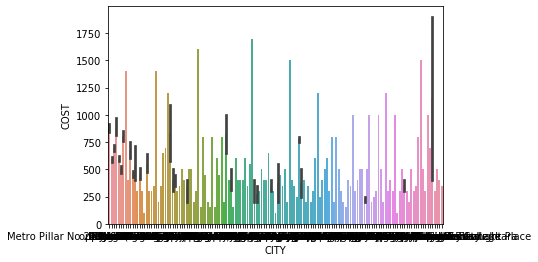

In [91]:
sns.barplot('CITY','COST',data=df)

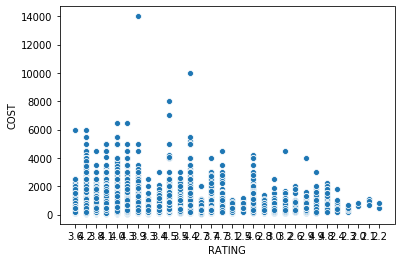

In [92]:
sns.scatterplot('RATING','COST',data=df)

In [94]:
df['RATING']=df['RATING'].astype('float')
df_test['RATING']=df_test['RATING'].astype('float')
df.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,COST,VOTE
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",Mumbai,Dombivali East,3.6,1200,49.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",Chennai,Chennai,4.2,1500,30.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,800,221.0
3,QUICK BITES,6346,"Tibetan, Chinese",Mumbai,Mumbai,4.1,800,24.0
4,DESSERT PARLOR,15387,Desserts,Mumbai,Lower Parel,3.8,300,165.0


In [95]:
# Let's Label ENcode the objects
col=['TITLE','CUISINES','CITY','LOCALITY']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[col] = df[col].apply(LabelEncoder().fit_transform)
df_test[col] = df_test[col].apply(LabelEncoder().fit_transform)

In [96]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,COST,VOTE
0,29,9438,2463,80,253,3.6,1200,49.0
1,31,13198,275,26,195,4.2,1500,30.0
2,29,10915,2800,26,963,3.8,800,221.0
3,93,6346,3893,80,639,4.1,800,24.0
4,48,15387,1663,80,538,3.8,300,165.0


In [97]:
# Let's separate Features and Labels
df_x=df.drop(columns=["COST"])
y=df[["COST"]]

In [98]:
# Let's do Standard Scaling(x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTE
0,-0.865376,0.365272,0.312940,0.946982,-0.803952,-0.436802,-0.435256
1,-0.803425,1.199307,-1.610404,-0.829088,-0.972019,0.985390,-0.457729
2,-0.865376,0.692897,0.609177,-0.829088,1.253420,0.037262,-0.231820
3,1.117063,-0.320589,1.569970,0.946982,0.314563,0.748358,-0.464825
4,-0.276839,1.684867,-0.390294,0.946982,0.021894,0.037262,-0.298055


# Modelling

In [99]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [100]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [101]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

max r2 score corresponding to  43  is  0.21399831660827762


In [102]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 200}

In [103]:
rfr=RandomForestRegressor(n_estimators=200)
r_state=maxr2_score(rfr,x,y)

max r2 score corresponding to  73  is  0.7643826276215383


In [104]:
# SVM

from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [105]:
svr=SVR(kernel="rbf",C=10)
r_state=maxr2_score(svr,x,y)

max r2 score corresponding to  99  is  0.22454306803735413


In [106]:
# Cross Validation

print("\n\nRandomForestRegressor\n\n")
model_evaluation(rfr,x,y)




RandomForestRegressor


Mean r2 score for regressor:  0.7004022791467136
standard deviation in r2 score for regressor:  0.03660767277439611
[0.65341733 0.73350059 0.68854594 0.67502719 0.75152035]


In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 51,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [108]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  347.5248099606654
r2_score is:  0.7168756088427193


In [109]:
test_ss=sc.fit_transform(df_test)
test_ss=pd.DataFrame(test_ss,columns=df_test.columns)
test_ss.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTE
0,-0.839739,-0.836470,0.717826,1.392059,1.327220,1.199813,0.159015
1,1.138472,1.087313,1.395761,0.947258,-0.573223,0.968782,-0.443943
2,-0.839739,-1.434981,1.054662,0.947258,0.238425,0.044661,-0.097512
3,0.789376,-1.705139,-1.456682,-0.346708,0.451235,0.044661,1.215092
4,1.138472,1.260331,1.404288,0.502458,-0.108010,-0.417400,-0.489495


In [110]:
test_data = test_ss.copy()
import joblib
joblib.dump(rfr,'Rest_cost.pkl')
file=joblib.load('Rest_cost.pkl')
prediction=file.predict(test_data)

In [111]:
cost = pd.DataFrame({"COST": prediction})
cost.to_csv('cost.csv', index=False)

In [112]:
cost = pd.read_csv('cost.csv')
cost.head()

,COST
0,1195.50
1,351.75
2,702.00
3,1636.75
4,366.25
